# 한글

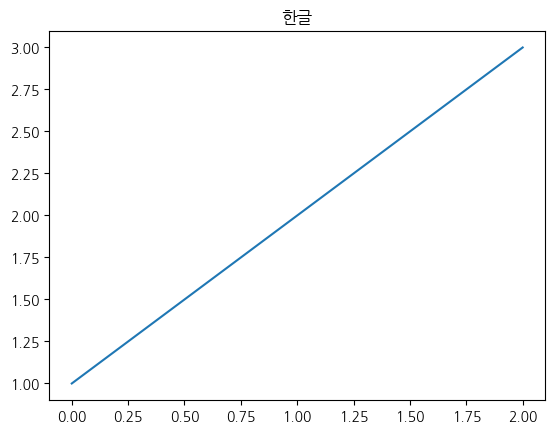

In [8]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 불러오기

In [9]:
# CSV 파일 불러오기
data = pd.read_csv('data/액체_모델용.csv')

In [10]:
data.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '액체화물'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50997 entries, 0 to 50996
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Datetime            50997 non-null  object 
 1   ETA_Year            50997 non-null  int64  
 2   ETA_Month           50997 non-null  int64  
 3   ETA_Day             50997 non-null  int64  
 4   ETA_Hour            50997 non-null  int64  
 5   호출부호                50997 non-null  object 
 6   입항일시                50997 non-null  object 
 7   출항일시                50997 non-null  object 
 8   접안_대기시간_분           50997 non-null  int64  
 9   출항_대기시간_분           50997 non-null  float64
 10  Service_Time_Start  50997 non-null  object 
 11  Service_Time_End    50997 non-null  object 
 12  계선장소_코드             50997 non-null  object 
 13  계선장소_숫자             50997 non-null  int64  
 14  계선장소명               50997 non-null  object 
 15  선박용도                50997 non-null  object 
 16  Serv

In [12]:
# 두 칼럼을 합쳐 새로운 칼럼 생성
data['계선장소'] = data['계선장소_코드'].astype(str) + data['계선장소_숫자'].astype(str)

# '계선장소_코드'와 '계선장소_숫자컬럼' 칼럼 삭제
data = data.drop(['계선장소_코드', '계선장소_숫자'], axis=1)


# XGBoost 설치

In [13]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 최종 비교용 모델링

## 수정(참고내용)

In [14]:
import pandas as pd
# CSV 파일 불러오기
Final_D = pd.read_csv('data/for_ship_model.csv')
Final_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50997 entries, 0 to 50996
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ETA_Year        50997 non-null  int64  
 1   ETA_Month       50997 non-null  int64  
 2   ETA_Day         50997 non-null  int64  
 3   ETA_Hour        50997 non-null  int64  
 4   호출부호            50997 non-null  object 
 5   접안_대기시간_분       50997 non-null  int64  
 6   계선장소명           50997 non-null  object 
 7   선박용도            50997 non-null  object 
 8   Service_Time_분  50997 non-null  float64
 9   대기율             50997 non-null  float64
 10  총톤수             50997 non-null  float64
 11  재화중량톤수          50997 non-null  float64
 12  선박제원(총길이, m)    50997 non-null  float64
 13  선박제원(너비, m)     50997 non-null  float64
 14  만재흘수(m)         50997 non-null  float64
 15  깊이(m)           50997 non-null  float64
 16  길이1(m)          50997 non-null  float64
 17  풍속(m/s)         50997 non-null 

In [15]:
Final_D.columns

Index(['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', '풍속(m/s)',
       '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)',
       '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded'],
      dtype='object')

In [16]:
Final_D.columns = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '선박_길이1', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

x_cols = ['ETA_Hour', 'Service_Time_분', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '풍속',
       '풍향', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수', '시설연평균_재화중량톤수', 
        '연평균_총입항건수', '선박_연평균_서비스시간', '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

## 모델링

Mean R^2: 0.6325696196396473
RMSE: 1296.1320739704447
특성 중요도:


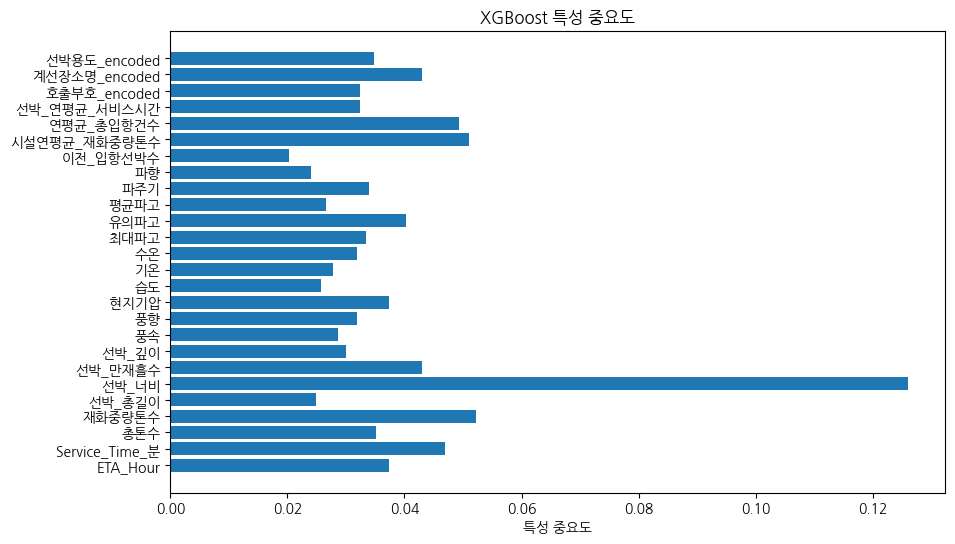

In [10]:
# 필요한 라이브러리 불러오기
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score  # 추가: 결정계수 계산을 위한 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 추가: 시각화를 위한 모듈

# 입력 변수와 타겟 변수 나누기
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost 모델 생성
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.3,
    n_estimators=200
)

# 10-fold 교차 검증 수행
scoring = 'neg_mean_squared_error'
cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)

# 결정계수 계산 및 출력
r2 = np.mean([r2_score(y, model.fit(X, y).predict(X)) for score in cv_results])
print(f"Mean R^2: {r2}")

# 결과 출력
rmse = np.sqrt(-cv_results.mean())
print(f"RMSE: {rmse}")

# 특성 중요도 출력
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
feature_names = X.columns

print("특성 중요도:")

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('특성 중요도')
plt.title('XGBoost 특성 중요도')
plt.show()


Mean R^2: 0.6325696196396473
Adjusted R^2: 0.6323821919392476
RMSE: 1296.1320739704447
특성 중요도:
           Feature  Importance
5            선박_너비    0.126095
3           재화중량톤수    0.052154
20    시설연평균_재화중량톤수    0.050979
21       연평균_총입항건수    0.049370
1   Service_Time_분    0.046882
6          선박_만재흘수    0.042992
24   계선장소명_encoded    0.042926
15            유의파고    0.040275
0         ETA_Hour    0.037436
10            현지기압    0.037349
2              총톤수    0.035130
25    선박용도_encoded    0.034749
17             파주기    0.033910
14            최대파고    0.033416
22    선박_연평균_서비스시간    0.032378
23    호출부호_encoded    0.032337
9               풍향    0.031961
13              수온    0.031939
7            선박_깊이    0.030036
8               풍속    0.028607
12              기온    0.027716
16            평균파고    0.026547
11              습도    0.025655
4           선박_총길이    0.024863
18              파향    0.023979
19        이전_입항선박수    0.020319


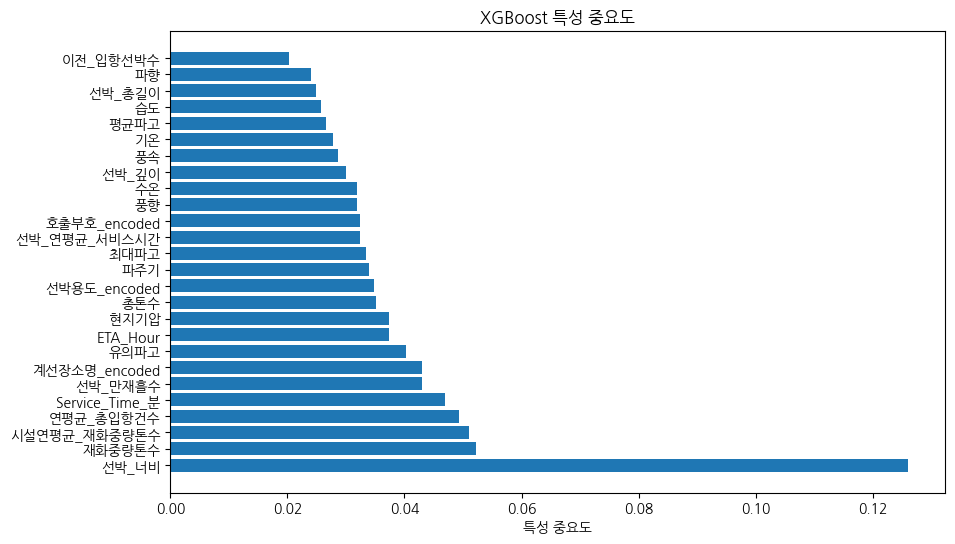

In [11]:
# 필요한 라이브러리 불러오기
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score  # 추가: 결정계수 계산을 위한 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 추가: 시각화를 위한 모듈

# 입력 변수와 타겟 변수 나누기
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost 모델 생성
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.3,
    n_estimators=200
)

# 10-fold 교차 검증 수행
scoring = 'neg_mean_squared_error'
cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)

# 결정계수 계산 및 출력
r2 = np.mean([r2_score(y, model.fit(X, y).predict(X)) for score in cv_results])
print(f"Mean R^2: {r2}")

# 데이터의 수와 독립 변수의 수 계산
n = X.shape[0]
k = X.shape[1]

# 조정 결정계수 계산
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(f"Adjusted R^2: {adj_r2}")

# 결과 출력
rmse = np.sqrt(-cv_results.mean())
print(f"RMSE: {rmse}")

# 특성 중요도 출력
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
feature_names = X.columns

# 특성 중요도를 DataFrame으로 변환하여 내림차순으로 정렬
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("특성 중요도:")
print(sorted_feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'])
plt.xlabel('특성 중요도')
plt.title('XGBoost 특성 중요도')
plt.show()

# 모델 예측

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
df1 = pd.read_csv('data/for_ship_model.csv')
df1.columns = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '선박_길이1', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

In [15]:
df2 = df1[x_cols]

In [16]:
B = pd.DataFrame({"Before" : y_pred})
B.describe()

,Before
count,10200.000000
mean,452.552795
std,657.125671
min,-1458.134033
25%,33.325609
50%,282.923233
75%,673.568588
max,16434.335938


In [17]:
after_y_pred = model.predict(df2)

A = pd.DataFrame({"After" : after_y_pred})
A.describe()

,After
count,50997.000000
mean,430.632690
std,757.805115
min,-1458.134033
25%,26.331234
50%,235.924698
75%,614.009094
max,37363.371094


In [18]:
# 울산항 끝판왕 석유제품 운반선들의 평균을.araboza

df_s = data[data['선박용도'] == "석유제품 운반선"]
# df_s.info()
df_s['계선장소명'].value_counts()
# ==> SK2부두 01          4999 ==> encoded =0

SK2부두 01          4999
현대오일터미널신항부두       2427
장생포호안             2331
S-OIL2부두          2205
SK2부두 02          1944
S-OIL1부두          1403
SK5부두             1089
정일1부두              980
달포부두 01            868
정박지-E1             787
정박지-M1             774
UTK부두              757
정일스톨트헤븐울산신항3부두     747
효성부두               739
SK1부두 11           733
온산2부두              573
신항컨테이너부두 04        556
온산1부두              543
S-OIL3부두           543
정박지-E2             529
정일2부두              525
OTK부두              378
SK1부두 12           363
정박지-E3             340
신항남방파제T/S부두 01     329
신항일반부두 01          323
UTT부두              320
정일스톨트헤븐울산신항4부두     319
정일스톨트헤븐울산신항5부두     276
신항남방파제T/S부두 02     256
SK4부두              231
가스부두               224
SK7부두              212
(구)벙커링전용정박지 E1     208
벙커링전용정박지-B11       205
4부두 01             204
SK8부두              196
S-OIL 4부두 03       193
UTK 신항부두           188
정박지-M4             187
정박지-M5             184
3부두 02             167
SK3부두              162
S-OIL 4부두 0

In [19]:
df_s.describe()

,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,접안_대기시간_분,출항_대기시간_분,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),액체화물
count,35956.000000,35956.000000,35956.00000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.000000,35956.0
mean,2021.023668,6.504895,15.79436,12.210340,392.842168,37.227584,1866.705751,43.436905,4148.403410,6892.542224,83.757045,14.202140,5.475122,7.112575,80.381985,26.348871,6.012872,190.715592,8.040609,1016.268191,71.149062,17.545230,19.829185,1.946677,1.196848,0.850364,6.053350,115.069025,1.0
std,0.814465,3.485673,8.76449,6.386082,1096.784443,408.087354,9715.272802,200.088483,9465.128631,16001.212578,40.386011,14.307927,2.398709,4.014658,37.011920,17.564640,3.059087,109.879173,3.871567,7.445740,16.397248,6.931756,4.271916,1.072750,0.657097,0.466443,2.000936,97.253563,0.0
min,2020.000000,1.000000,1.00000,0.000000,0.000000,0.000000,-11040.000000,0.000000,63.000000,0.000000,23.930000,6.000000,0.000000,2.500000,23.900000,0.000000,0.000000,0.000000,0.100000,841.800000,27.000000,-6.100000,12.400000,0.200000,0.000000,0.000000,2.000000,0.000000,1.0
25%,2020.000000,3.000000,8.00000,8.000000,0.000000,0.000000,410.000000,0.000000,534.000000,1133.000000,59.400000,10.000000,4.000000,4.600000,60.020000,10.000000,3.600000,70.000000,5.000000,1010.761174,58.000000,12.400000,15.800000,1.200000,0.700000,0.500000,4.600000,40.797035,1.0
50%,2021.000000,7.000000,16.00000,12.000000,0.000000,0.000000,825.000000,0.000000,1130.000000,2286.000000,74.000000,12.000000,5.000000,5.950000,74.000000,25.000000,5.900000,222.000000,7.717332,1016.500000,71.000000,17.700000,19.400000,1.700000,1.100000,0.800000,5.800000,64.000000,1.0
75%,2022.000000,10.000000,23.00000,17.000000,180.000000,0.000000,1775.000000,18.819545,2403.000000,3612.258000,95.600000,15.000000,6.000000,7.300000,84.020000,40.000000,8.200000,287.000000,10.600000,1021.800000,86.395226,23.100000,23.300000,2.500000,1.500000,1.100000,7.100000,216.000000,1.0
max,2022.000000,12.000000,31.00000,23.000000,37488.000000,42600.000000,954615.000000,31600.000000,228283.000000,312135.000000,399.900000,2402.000000,23.100000,85.000000,385.920000,58.000000,17.700000,360.000000,111.200000,1035.300000,100.000000,32.400000,30.700000,10.000000,5.800000,4.100000,12.800000,360.000000,1.0


In [20]:
df2.head()

,ETA_Hour,Service_Time_분,총톤수,재화중량톤수,선박_총길이,선박_너비,선박_만재흘수,선박_깊이,풍속,풍향,현지기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,이전_입항선박수,시설연평균_재화중량톤수,연평균_총입항건수,선박_연평균_서비스시간,호출부호_encoded,계선장소명_encoded,선박용도_encoded
0,1,430.0,700.0,0.0,70.90,12.0,3.9,5.35,9.3,330.0,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,0,2073.888986,1729.000000,1452.987426,0,0,0
1,14,2720.0,71342.0,20884.0,200.00,35.4,10.6,21.10,1.2,2.0,1019.8,58.0,22.1,23.1,1.2,0.6,0.4,7.1,55.0,0,5354.680508,21.333333,1365.305060,240,39,2
2,15,1475.0,320.0,820.0,49.01,9.2,2.0,4.40,5.5,60.0,1019.2,69.0,21.8,23.1,1.1,0.7,0.5,6.4,38.0,7,2073.888986,1729.000000,570.225877,572,0,0
3,15,2160.0,1119.0,0.0,69.03,12.0,5.3,7.37,5.5,60.0,1019.2,69.0,21.8,23.1,1.1,0.7,0.5,6.4,38.0,2,2462.584826,356.000000,2889.513393,1954,3,3
4,15,7965.0,3910.0,5657.0,119.20,20.0,6.6,8.50,5.5,60.0,1019.2,69.0,21.8,23.1,1.1,0.7,0.5,6.4,38.0,0,5535.810444,488.000000,4843.125000,1014,16,2


In [22]:
df3 = df2.head(24)
df3['ETA_Hour'] = range(1,25)
df3['Service_Time_분'] = df2['Service_Time_분'].median()
df3['총톤수'] = df2['총톤수'].median()
df3['재화중량톤수'] = df2['재화중량톤수'].median()
df3['선박_총길이'] = df2['선박_총길이'].median()
df3['선박_너비'] = df2['선박_너비'].median()
df3['선박_만재흘수'] = df2['선박_만재흘수'].median()
df3['선박_깊이'] = df2['선박_깊이'].median()
df3['풍속'] = df2['풍속'].median()
df3['풍향'] = df2['풍향'].median()
df3['현지기압'] = df2['현지기압'].median()
df3['습도'] = df2['습도'].median()
df3['기온'] = df2['기온'].median()
df3['수온'] = df2['수온'].median()
df3['최대파고'] = df2['최대파고'].median()
df3['유의파고'] = df2['유의파고'].median()
df3['평균파고'] = df2['평균파고'].median()
df3['파주기'] = df2['파주기'].median()
df3['파향'] = df2['파향'].median()
df3['이전_입항선박수'] = df2['이전_입항선박수'].median()
df3['시설연평균_재화중량톤수'] = df2['시설연평균_재화중량톤수'].median()
df3['연평균_총입항건수'] = df2['연평균_총입항건수'].median()
df3['선박_연평균_서비스시간'] = df2['선박_연평균_서비스시간'].median()
df3['호출부호_encoded'] = df2['호출부호_encoded'].median()
df3['계선장소명_encoded'] = df2['계선장소명_encoded'].median()
df3['선박용도_encoded'] = df2['선박용도_encoded'].median()
df3.describe()

,ETA_Hour,Service_Time_분,총톤수,재화중량톤수,선박_총길이,선박_너비,선박_만재흘수,선박_깊이,풍속,풍향,현지기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,이전_입항선박수,시설연평균_재화중량톤수,연평균_총입항건수,선박_연평균_서비스시간,호출부호_encoded,계선장소명_encoded,선박용도_encoded
count,24.000000,24.0,24.0,24.0,24.00,24.0,24.0,24.0,2.400000e+01,24.0,24.0,24.0,24.0,24.0,24.0,24.0,2.400000e+01,24.0,24.0,24.0,24.00000,24.0,24.000000,24.0,24.0,24.0
mean,12.500000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0
std,7.071068,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9.072812e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.134102e-16,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0
min,1.000000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0
25%,6.750000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0
50%,12.500000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0
75%,18.250000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0
max,24.000000,940.0,1411.0,2398.0,79.99,13.4,5.0,6.2,5.900000e+00,222.0,1016.4,71.0,17.7,19.4,1.7,1.1,8.000000e-01,5.8,64.0,0.0,5312.99547,340.0,1377.305058,310.0,22.0,0.0


In [23]:
df_con = df3['ETA_Hour']

In [25]:
OIL_ship = model.predict(df3)

DD = pd.DataFrame({"After" : OIL_ship})
DD

,After
0,603.473755
1,615.586975
2,615.586975
3,615.586975
4,627.925842
5,623.439514
6,562.326660
7,562.326660
8,577.055725
9,607.107178


In [26]:
result = pd.concat([df_con, DD], axis=1)
result

,ETA_Hour,After
0,1,603.473755
1,2,615.586975
2,3,615.586975
3,4,615.586975
4,5,627.925842
5,6,623.439514
6,7,562.326660
7,8,562.326660
8,9,577.055725
9,10,607.107178


In [27]:
# 'ETA_Hour' 열이 7 또는 17인 행을 추출
filt_df = result[(result['ETA_Hour'] == 7) | (result['ETA_Hour'] == 12)]
filt_df

,ETA_Hour,After
6,7,562.326660
11,12,629.908569


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 데이터프레임을 재구성하여 Seaborn에 적합한 형태로 만듭니다.
data = pd.DataFrame({
    'Category': filt_df['ETA_Hour'],
    'Mean_Value': filt_df['After']
})

plt.figure(figsize=(6, 5))

# Seaborn을 사용하여 막대 그래프 그리기
ax = sns.barplot(x='Category', y='Mean_Value', data=data, palette=['lightsteelblue', 'cornflowerblue'], width=0.5)  # width를 조절하여 홀쭉하게 만듭니다.

# 그래프 설정
plt.title('시간 별 대기시간 예측')
plt.xlabel('시간')
plt.ylabel('대기시간 예측값(분)')
plt.show()


NameError: name 'filt_df' is not defined